# Import Modules

In [29]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
# from scipy.fftpack import dct, idct

# Implementation

Quantization Matrix

In [30]:
quantization = np.array([
    [16, 11, 10, 16, 24, 40, 51, 61],
    [12, 12, 14, 19, 26, 58, 60, 55],
    [14, 13, 16, 24, 40, 57, 69, 56],
    [14, 17, 22, 29, 51, 87, 80, 62],
    [18, 22, 37, 56, 68, 109, 103, 77],
    [24, 35, 55, 64, 81, 104, 113, 92],
    [49, 64, 78, 87, 103, 121, 120, 101],
    [72, 92, 95, 98, 112, 100, 103, 99],
])

quantization_B = np.array([
    [8, 6, 5, 8, 12, 20, 26, 31],
    [6, 6, 7, 10, 13, 29, 30, 28],
    [7, 7, 8, 12, 20, 29, 35, 28],
    [7, 9, 11, 15, 26, 44, 40, 31],
    [9, 11, 19, 28, 34, 55, 52, 39],
    [12, 18, 28, 32, 41, 52, 57, 46],
    [25, 32, 39, 44, 52, 61, 60, 51],
    [36, 46, 48, 49, 56, 50, 52, 50],
])


Predict Functions

In [31]:

'''
predict function 1
Description:
    Calculate the f(x, y) = f(-x, y) prediction
Input: x and y coordinates and the matrix of the coordinates
Output: one prediction
'''
def predict_function_1(x, y, matrix):
    M, N = matrix.shape

    error = x >= M or y >= N
    if error:
        return
    
    if (x == 0 and y == 0):
        return matrix[0][0]
    if x > 0:
        return matrix[x-1][y]
    elif x == 0:
        return matrix[x][y-1]

'''
predict function 2
Description:
    Calculate the f(x, y) = 0.5*f(-x, y) + 0.5*f(x, -y) prediction
Input: x and y coordinates and the matrix of the coordinates
Output: one prediction
'''
def predict_function_2(x, y, matrix):
    M, N = matrix.shape

    error =  x >= M or y >= N
    if error:
        return
    
    if (x == 0 and y == 0):
        return matrix[0][0]
    
    if y == 0:
        return matrix[x-1][y]
    elif x == 0:
        return matrix[x][y-1]
    elif x > 0 and y > 0:
        return .5 * matrix[x-1][y] + .5 * matrix[x][y-1]





## Compress

### DCT

In [32]:
'''
DCT Function
Description:
    Calculate the transformed of a image, breaking it in bloks of 8x8
    Use two times the dct for 1D, each time for one axis of the image
Input: Original image
Output: image transformed
Warning: Need to deal with images that are not multiple of 8
'''

def DCT(img):
    Y = np.zeros(img.shape)

    U = img.shape[0]//8
    V = img.shape[1]//8

    for u in range(U):
        for v in range(V):
            img_blck = np.float32(img[u*8: u*8 + 8, v*8: v*8 + 8]) # float conversion
            Y[u*8: u*8 + 8, v*8: v*8 + 8] = cv.dct(img_blck, cv.DCT_INVERSE)
    
    return Y

### DCT + Quantization

In [33]:
'''
Function: quant_DCT
Description:
    For each block 8x8 from the image transformed
    Is divided by the quantization matrix

Input: image transformed
Output: image tranformed divided by quantization 
'''

def quant_DCT(Y):
    Y_quant = np.zeros(Y.shape)
    U = Y.shape[0]//8
    V = Y.shape[1]//8

    for u in range(U):
        for v in range(V):
            Y_quant[u*8 : u*8 + 8, v*8 : v*8 + 8] = (Y[u*8 : u*8 + 8, v*8 : v*8 + 8] / quantization)
    
    return Y_quant

## Decompress

In [34]:
def dequant_DCT(Y_quant):
    U = Y_quant.shape[0]//8
    V = Y_quant.shape[1]//8
    Y_dequant = np.zeros(Y_quant.shape)
    
    for u in range(U):
        for v in range(V):
            Y_dequant[u*8 : u*8 + 8, v*8 : v*8 + 8] = Y_quant[u*8 : u*8 + 8, v*8 : v*8 + 8] * quantization
    
    return Y_dequant



In [35]:
def iDCT(Y):

    U = Y.shape[0]//8
    V = Y.shape[1]//8
    img_rec = np.zeros(Y.shape)
    for u in range(U):
        for v in range(V):
            img_rec[u*8 : u*8 + 8, v*8 : v*8 + 8] = cv.idct(Y[u*8 : u*8 + 8, v*8 : v*8 + 8])
    
    return img_rec

# Execution and Test

## Load Image

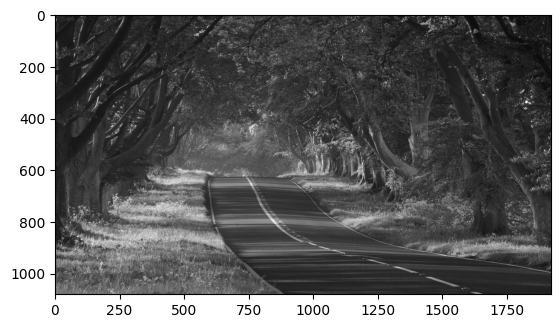

In [36]:
img = cv.imread('imgs/highway.jpg', cv.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')

## Compress


### DCT

(array([[0.000e+00, 5.000e+00, 9.390e+02, ..., 1.000e+00, 0.000e+00,
         0.000e+00],
        [0.000e+00, 1.800e+01, 1.061e+03, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [1.000e+00, 7.000e+00, 1.069e+03, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        ...,
        [0.000e+00, 0.000e+00, 1.080e+03, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [0.000e+00, 0.000e+00, 1.080e+03, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [0.000e+00, 0.000e+00, 1.080e+03, ..., 0.000e+00, 0.000e+00,
         0.000e+00]]),
 array([-555.95526123, -320.07223511,  -84.18920898,  151.69381714,
         387.57684326,  623.45986938,  859.34289551, 1095.22592163,
        1331.10894775, 1566.99197388, 1802.875     ]),
 <a list of 1920 BarContainer objects>)

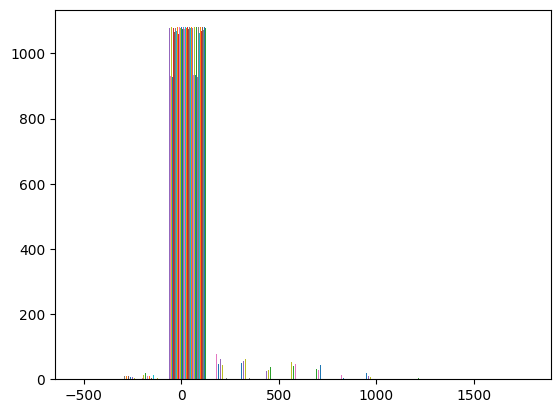

In [37]:
Y = DCT(img)
plt.hist(Y)

### Quantizando

(array([[0.00000000e+00, 1.12917796e-04, 2.03252033e-03, ...,
         1.12917796e-04, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 1.69376694e-04, 4.96838302e-03, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [5.64588979e-05, 0.00000000e+00, 2.37127371e-03, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]),
 array([-51. , -34.6, -18.2,  -1.8,  14.6,  31. ,  47.4,  63.8,  80.2,
         96.6, 113. ]),
 <a list of 1920 BarContainer objects>)

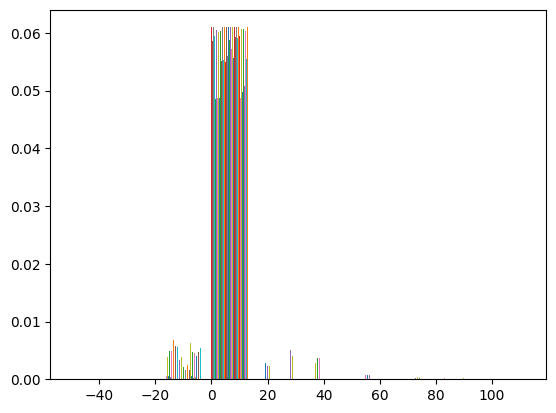

In [38]:
Y_quant = np.round(quant_DCT(Y))
plt.hist(Y_quant, density=True)

In [51]:

nums = np.unique(Y_quant)
filter = (nums >= 0) * (nums <= 19)
filter.sum()

20

### Função de Predição + matriz de erros

In [40]:
U, V = Y_quant.shape

Error_predic1 = np.zeros(Y_quant.shape)
Error_predic2 = np.zeros(Y_quant.shape)
for u in range(U):
    for v in range(V):
        Error_predic1[u][v] = Y_quant[u][v] - predict_function_1(u, v, Y_quant)
        Error_predic2[u][v] = Y_quant[u][v] - predict_function_2(u, v, Y_quant)


Error_predic1[0][0] = Error_predic2[0][0] = Y_quant[0][0]

In [41]:
print(f'Y_quant have {np.unique(Y_quant).size} unique values')
print(f'Error_predict1 have {np.unique(np.trunc(Error_predic1)).size} unique values')
print(f'Error predict2 have {np.unique(np.trunc(Error_predic2)).size} unique values')

Y_quant have 148 unique values
Error_predict1 have 222 unique values
Error predict2 have 181 unique values


(array([[ 0.,  2., 36., ...,  2.,  0.,  0.],
        [ 0.,  3., 88., ...,  0.,  0.,  0.],
        [ 1.,  0., 42., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([-51. , -34.6, -18.2,  -1.8,  14.6,  31. ,  47.4,  63.8,  80.2,
         96.6, 113. ]),
 <a list of 1920 BarContainer objects>)

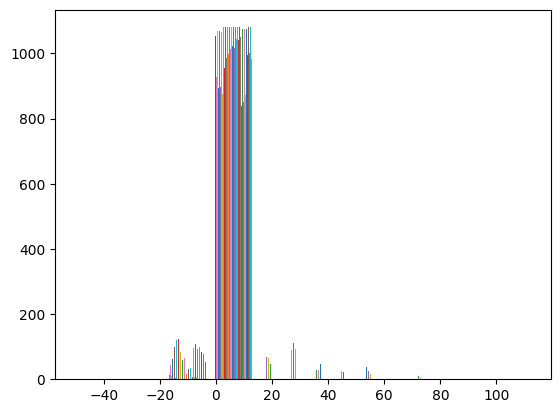

In [42]:
plt.hist(Y_quant)

### Huffman

## Unconpress

### Huffman

### Dequantizando

In [43]:
Y_dequant = dequant_DCT(Y_quant)

### Transformada inversa

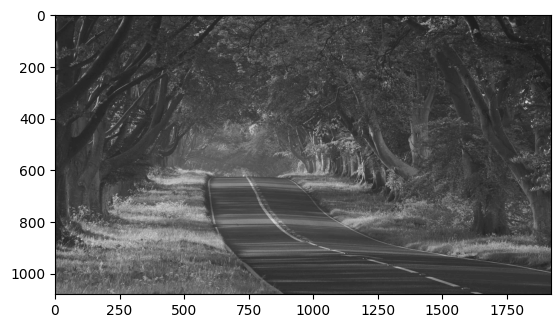

In [44]:
img_rec = iDCT(Y_dequant)
plt.imshow((img_rec), cmap='gray')


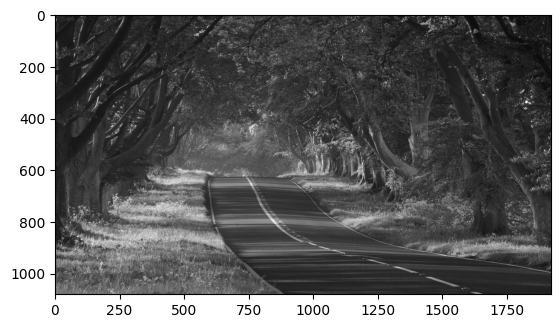

In [45]:
plt.imshow((img), cmap='gray')

# Análises


In [46]:
print(f'MSE: {((img - img_rec)**2).sum()/img.size}')
print(f'ME: {np.abs(img - img_rec).max()}')

MSE: 38.45537597648706
ME: 57.36000357755326


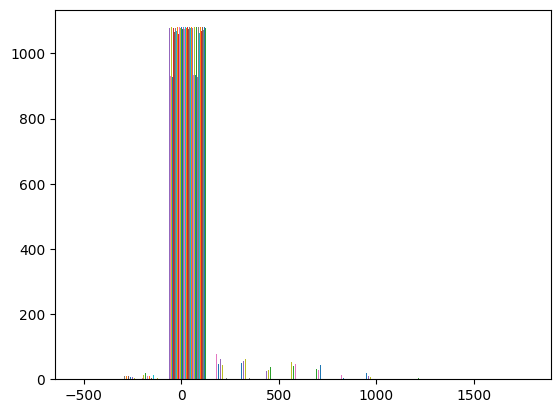

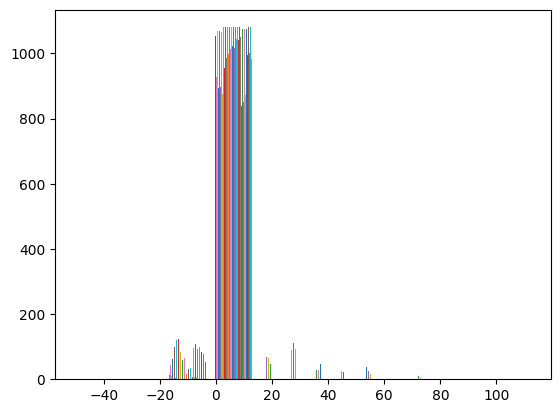

In [47]:
# histogramas de Y e Y_quant para, posteriormente, criar matriz de erros para huffman
# observe o eixo-x, i.e. os erros serão mais próximos
plt.hist(Y)
plt.show()
plt.hist(Y_quant)
plt.show()

In [48]:
(np.unique(Y).size, np.unique(Y_quant).size)

(1217224, 148)